<a href="https://colab.research.google.com/github/maicg01/python-image-processing/blob/main/three_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import pytorch_lightning as pl
import zipfile
from PIL import Image
import torch
import torchvision
import matplotlib.pyplot as plt
import torchvision.models as models
from torchvision import transforms as T
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
import random
from sklearn.model_selection import train_test_split
import cv2

In [2]:
def prepare_data():
    train_zip = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/CP/train/datatrain.zip')
    file_names = [fname for fname in train_zip.namelist() if 'sharp/f' in fname or 'blur/f' in fname or 'mask/f' in fname]
    print('Loading images metadata...')
    images = [Image.open(train_zip.open(fname)).resize((32,32)) for fname in file_names]
    print('Reading pixels...')
    for i, img in enumerate(images):
        img.load()
        if i % 100 == 0:
            print(i)
    [img.load() for img in images]
    print('Done', len(images))
    targets = [2 if 'sharp' in fname else 1 if 'blur' in fname else 0 for fname in file_names]

    return images, targets

class MyDataset(Dataset):
  def __init__(self, images, targets, transform=None):
    super().__init__()
    self.images = images
    self.targets = targets
    self.transform = transform

  def __len__(self):
    return len(self.targets)

  def __getitem__(self, idx):
    img = self.images[idx]
    y = self.targets[idx]
    if self.transform is not None:
      img = self.transform(img)
    
    return img, y


In [3]:
images, targets = prepare_data()

Loading images metadata...
Reading pixels...
0
100
200
Done 232


In [5]:
train_transform = T.Compose([T.ToTensor(),
       T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [6]:
train_images, test_images, train_targets, test_targets = train_test_split(images, targets, test_size=0.1, shuffle=True)
train = MyDataset(train_images, train_targets, transform=train_transform)
test = MyDataset(test_images, test_targets, transform=train_transform)

In [7]:
trainloader = DataLoader(train, batch_size=4)
testloader = DataLoader(test, batch_size=4)

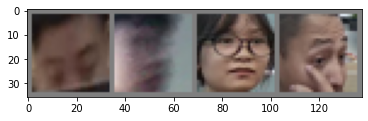

blur  blur  sharp mask 


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
batch_size = 4
classes = ('mask', 'blur', 'sharp')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 10 == 9:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    10] loss: 0.011
[1,    20] loss: 0.011
[1,    30] loss: 0.011
[1,    40] loss: 0.011
[1,    50] loss: 0.010
[2,    10] loss: 0.010
[2,    20] loss: 0.009
[2,    30] loss: 0.009
[2,    40] loss: 0.007
[2,    50] loss: 0.006
[3,    10] loss: 0.005
[3,    20] loss: 0.005
[3,    30] loss: 0.006
[3,    40] loss: 0.005
[3,    50] loss: 0.005
[4,    10] loss: 0.004
[4,    20] loss: 0.004
[4,    30] loss: 0.005
[4,    40] loss: 0.004
[4,    50] loss: 0.005
[5,    10] loss: 0.004
[5,    20] loss: 0.004
[5,    30] loss: 0.005
[5,    40] loss: 0.004
[5,    50] loss: 0.004
[6,    10] loss: 0.004
[6,    20] loss: 0.004
[6,    30] loss: 0.005
[6,    40] loss: 0.004
[6,    50] loss: 0.004
[7,    10] loss: 0.004
[7,    20] loss: 0.004
[7,    30] loss: 0.005
[7,    40] loss: 0.004
[7,    50] loss: 0.004
[8,    10] loss: 0.004
[8,    20] loss: 0.004
[8,    30] loss: 0.005
[8,    40] loss: 0.004
[8,    50] loss: 0.004
[9,    10] loss: 0.004
[9,    20] loss: 0.004
[9,    30] loss: 0.005
[9,    40] 

In [13]:
PATH = './three_classification_net.pth'
torch.save(net.state_dict(), PATH)

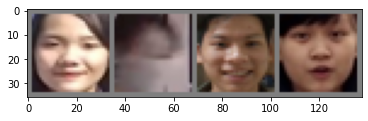

GroundTruth:  sharp blur  sharp sharp


In [14]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [15]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

In [16]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  sharp blur  sharp sharp


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 79 %


In [ ]:
#convert to onnx runtime
import torch.onnx 
from torch.autograd import Variable

#Function to Convert to ONNX 
def Convert_ONNX(): 

    # set the model to inference mode 
    model.eval() 

    # Let's create a dummy input tensor  
    dummy_input = Variable(torch.randn(1, 3, 32, 32))

    # Export the model   
    torch.onnx.export(model,         # model being run 
         dummy_input,       # model input (or a tuple for multiple inputs) 
         "ImageClassifier.onnx",       # where to save the model  
         export_params=True,  # store the trained parameter weights inside the model file 
         opset_version=10,    # the ONNX version to export the model to 
         do_constant_folding=True,  # whether to execute constant folding for optimization 
         input_names = ['modelInput'],   # the model's input names 
         output_names = ['modelOutput'], # the model's output names 
         dynamic_axes={'modelInput' : {0 : 'batch_size'},    # variable length axes 
                                'modelOutput' : {0 : 'batch_size'}}) 
    print(" ") 
    print('Model has been converted to ONNX') 

In [ ]:
if __name__ == "__main__": 

    # Let's load the model we just created and test the accuracy per label 
    model = Net() 
    path = "/content/drive/MyDrive/Colab Notebooks/CP/face.pth" 
    model.load_state_dict(torch.load(path)) 

    # Test with batch of images 
    #testBatch() 
    # Test how the classes performed 
    #testClassess() 
 
    # Conversion to ONNX 
    Convert_ONNX() 